# Plot Fit Error for QNM Frequencies

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import positive
import positive.physics as pp
from os.path import expanduser
import pickle
import numpy as np
from scipy.io import loadmat
from scipy.interpolate import InterpolatedUnivariateSpline as spline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from imp import load_source

(positive)>> Applying custom matplotlib settings.


## Generate Fit Residuals

In [3]:
module_path = '../../../positive/data/ksm2_cw.py'
cw_module = load_source( '', module_path )

In [4]:
N = 61
jf_lim = 0.995
jf = jf_lim*np.sin(np.linspace(-np.pi/2,np.pi/2,N))
cw,cw2 = {},{}
CW = {}
zlist = [
    (2, -2, 0), (2, -2, 1), (2, -1, 0), (2, 1, 0), (2, 2, 0), (2, 2, 1),
    (3, -3, 0), (3, -3, 1), (3, -2, 0), (3, 2, 0), (3, 3, 0), (3, 3, 1),
    (4, -4, 0), (4, -3, 0), (4, 3, 0), (4, 4, 0),
    (5, -5, 0), (5, 5, 0)]
for k in cw_module.CW.keys():
    l,m,n = k
    if m > 0:
        CW[k] = np.array([pp.leaver( j, l,m,n )[0] for j in jf])
        cw[k] = pp.cw181003550(jf,*k)
        try:
            cw2[k] = pp.Berti0512160(jf, l, m, n)
        except:
            cw2[k] = jf/0

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


In [5]:
res = {}
res2 = {}
pres = {}
pres2= {}
for k in cw.keys():
    res[k] = CW[k]-cw[k].conj()
    res2[k] = CW[k]-cw2[k].conj()
    
    pres[k] = 100*np.abs(res[k]/CW[k])
    pres2[k]= 100*np.abs(res2[k]/CW[k])

## Define functions

In [6]:
def w220_180601772(a_f):
    return 0.373672*(
        1.0 - 1.74085*a_f + 0.808214*a_f**2 - 0.0598838*a_f**3)/(
        1.0 - 2.07641*a_f + 1.31524*a_f**2 - 0.235896*a_f**3) + 1j*0.0889623*(
        1.0 - 1.82261*a_f + 0.701584*a_f**2 + 0.121126*a_f**3)/(
        1.0 - 1.80020*a_f + 0.720117*a_f**2 + 0.0811633*a_f**3)

In [7]:
def plotmks(
        ax, X, Y, n, k=5,
        lw=1, ls='-', color=None, alpha=1,
        marker=None, ms=10, mec=None,mfc=None,
        zorder=-10, label=None):
    # Plot markers
    X_spots = np.linspace(X[0],X[-1],n)
    p = ax.plot(
        X_spots, spline(X, Y)(X_spots),
        ls='none', color=color, alpha=alpha,
        marker=marker, ms=ms, mec=mec, mfc=mfc,
        zorder=zorder,label=label)
    
    # Plot line
    XX = np.linspace(X[0], X[-1], 1e3)
    clr = p[0].get_color()
    if isinstance(p[0].get_color(),str):
        clr = np.array([int(p[0].get_color().lstrip('#')[i:i+2], 16) for i in (0, 2 ,4)])/255.0
    ax.plot(
        XX, spline(X, Y, k=k)(XX),
        lw=lw, ls=ls, color=clr, alpha=alpha,
        zorder=zorder)

## FIG. 1 (Bottom Left)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


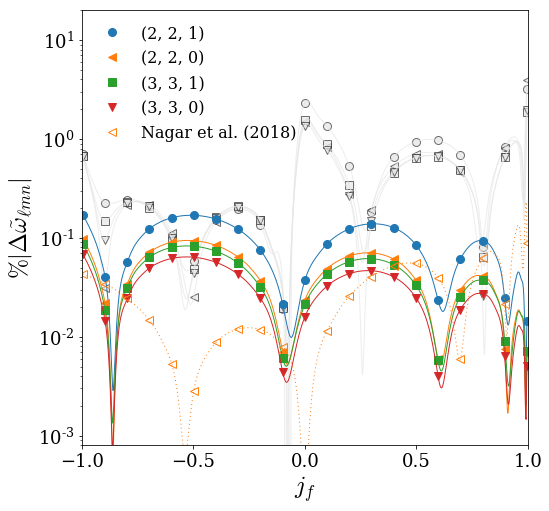

In [8]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] 

fig, ax = plt.subplots(figsize=2*plt.figaspect(1))
fig.subplots_adjust(hspace=.05)

fs = 12
zlistA = [(2,2,1), (2,2,0), (3,3,1), (3,3,0)]
mkrlist = 'o<sv*h>^pXDo<vs*h>p*'
lw, ms = 1,8

for k,z in enumerate(zlistA):
    plotmks(
        ax, jf, pres2[z], 21, k=2,
        lw=lw, color=0.9*np.ones(3), alpha=0.7,
        marker=mkrlist[k], ms=ms, mec=0.2*np.ones(3),
        zorder=-100)
    plotmks(
        ax, jf, pres[z], 21,
        lw=lw,
        marker=mkrlist[k], ms=ms,
        label=str(z))

nagar = 100*np.abs(w220_180601772(jf).conj()/CW[(2,2,0)]-1)
label = '(2, 2, 0) [*]'
label = 'Nagar et al. (2018)'
plotmks(
    ax, jf, nagar, 21,
    lw=lw, ls=':', color=plt.rcParams["axes.prop_cycle"].by_key()['color'][1],
    marker=mkrlist[1], ms=ms, mfc='none',
    label=label)


ax.set_xlabel('$j_f$', fontsize=24)
ax.set_ylabel(r'$\%|\Delta\tilde\omega_{ \ell m n}|$', fontsize=24)
ax.set_xlim([-1,1])
ax.set_yscale('log')
ax.legend(ncol=1, fontsize=16, frameon=False, loc=2)
ax.set_ylim([8e-4, 2e1])
ax.set_xticks(np.linspace(-1, 1, 5))
    
plt.show()
plt.close(fig)
fig.savefig('./fig1-bottom-left.pdf', pad_inches=0, bbox_inches='tight')
fig.savefig('./../res_cw_0.pdf', pad_inches=0.05, bbox_inches='tight')

## FIG. 1 (Bottom Right)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


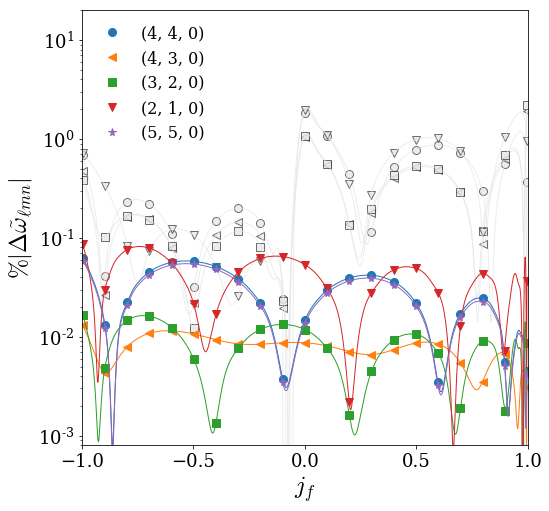

In [9]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] 

fig, ax = plt.subplots(figsize=2*plt.figaspect(1))
fig.subplots_adjust(hspace=.05)

fs = 12
zlistB = [(4,4,0), (4,3,0), (3,2,0), (2,1,0), (5,5,0)]
mkrlist = 'o<sv*h>^pXDo<vs*h>p*'
lw, ms = 1,8

for k,z in enumerate(zlistB):
    plotmks(
        ax, jf, pres2[z], 21, k=2,
        lw=lw, color=0.9*np.ones(3), alpha=0.7,
        marker=mkrlist[k], ms=ms, mec=0.2*np.ones(3),
        zorder=-100)
    plotmks(
        ax, jf, pres[z], 21,
        lw=lw,
        marker=mkrlist[k], ms=ms,
        label=str(z))

ax.set_xlabel('$j_f$', fontsize=24)
ax.set_ylabel(r'$\%|\Delta\tilde\omega_{ \ell m n}|$', fontsize=24)
ax.set_xlim([-1,1])
ax.set_yscale('log')
ax.legend(ncol=1, fontsize=16, frameon=False, loc=2)
ax.set_ylim([8e-4, 2e1])
ax.set_xticks(np.linspace(-1, 1, 5))
    
plt.show()
plt.close(fig)
fig.savefig('./fig1-bottom-right.pdf', pad_inches=0, bbox_inches='tight')
fig.savefig('./../res_cw_1.pdf', pad_inches=0.05, bbox_inches='tight')